Note: before you read this, please go through the probability_theory-discrete and probability_theory-continuous notebooks first. 

# 1. How informative is my distribution?

Wouldn't it be nice to know, given a distribution, how much information it has packed in there?

(Some of the material here is taken from McElreath (2015) Chapter 9)

## What is Entropy?

To illustrate, imagine you are baking a cake. You get out all the ingredients and put them each into their own respective bowls. Then you put everything into a big mixing bowl and you begin to mix. You mix so much that you get to a point where mixing any more would make no difference because the random shuffling of all of the ingredients due to additional mixing would yield an equally random shuffling of ingredients. 

This is an example of entropy at its two extremes. At one extreme, we have *minimum* entropy where all of the ingredients are distinct and identifiable in their respective bowls. At the other extreme, we have the point where additional mixing would not increase the combination of the ingredients. This is called *maximum* entropy. 

It turns out that this principle is quite useful in probability theory: probability distributions that are fairly even (i.e., all of the possible combinations of all values of all variables yield roughly similar probabilities) is when we have high entropy. When we have it so only one or two variable values carry most of the probability mass, we have low entropy. 

For example, what is the entropy of a coin toss?

In [1]:
def P(X=''):
    if X == 'heads': return 0.5
    if X == 'tails': return 0.5

Answer: it's going to be high (whatever a high value of entropy might be). 

What is the entropy that it will be cold or snowy in Boise in January in 2017?

In [3]:
def P(X=''):
    if X == 'cold-snowy':     return 0.95
    if X == 'not-cold-snowy': return 0.05

The entropy here will be low because a lot of the probability mass is held by one variable value. 

Entropy is calculated as follows:

### $$H(p) = - \sum_{x \in X} P(X=x) log(P(X=x)) $$

Notice! This is how it is computed for discrete as well as continuous distributions. The entropy is based on the *data*. 

Let's calculate the entropies of the two distributions above. First, make sure you press shift-enter on the first one then come back to this one:

In [2]:
import math

- (P('heads') * math.log(P('heads')) + P('tails') * math.log(P('tails')))

0.6931471805599453

Then, press shift-enter on the second probability function then come back to this one:

In [4]:
- (P('cold-snowy') * math.log(P('cold-snowy')) + P('not-cold-snowy') * math.log(P('not-cold-snowy')))

0.1985152433458726

As we suspected, the entropy for the 50/50 case was much higher than for the 95/05 case. 

Let's look at this a bit closer. What if we have a binary variable, and we make a plot where the y axis is the entropy, and the x axis is the amount of probability mass in one of the variable values? Let's make the variable `X` take on the values `a` and `b`. 

In [6]:
X = {}
X['a'] = [i * 0.01 for i in range(1,100)] # list of 0.01 to 0.99
X['b'] = [1 - (i * 0.01) for i in range(1,100)] # list of 0.99 to 0.01

In [7]:
# check to make sure one of the value pairs sum to one:
X['a'][78], X['b'][78]

(0.79, 0.20999999999999996)

In [8]:
# define entropy
def H(p):
    return p * math.log(p)

In [9]:
y_axis = [-(H(a) + H(b)) for a,b in zip(X['a'], X['b'])]

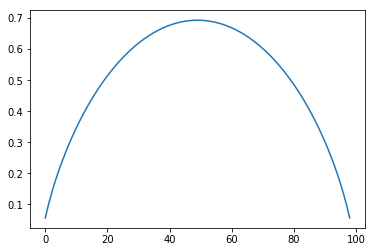

In [10]:
%matplotlib inline  

import matplotlib.pyplot as plt

plt.plot(range(0,len(y_axis)), y_axis)

Question:

![alt text](ytho.jpg "Title")

Answer:

* It begins with variable value `a` with 0.99 and variable value `b` with 0.01, which is very low entropy. Then as mass is moved from `a` to `b`, the two values slowly move closer to each other, until they reach 0.5/0.5 which is the highest entropy that can be had in a distribution over one variable with two values. Then mass continues to be moved from `a` to `b`, until it's `b` that has 0.99 and `a` that has 0.1, which is back to low entropy. 
* It doesn't matter which variable has the high probability mass; entropy is agnostic to that. It only cares about the actual probabilities themselves. 
* Note that if we used another log base like `ln` the answer would be different (see reading). 

## What makes entropy useful?

There are many ways to obtain information from a distribution. We've seen some ways already, such as the mean and the standard deviation. Another thing to look at could be the maximum and minimum value. Entropy is yet a way of looking at a distribution, but only the probabilities themselves. 

#### Entropy turns out to be quite useful, indeed. That is because we can use it to:

* Determine how certain a distribution is (i.e., low entropy means more mass is focused around one or two variable values, so with lower entropy we know that something like a classifier that is producing a distribution over possible class labels is more decided on one value than another)
* When dealing with finding the right probability density function for a continuous distribution (remember our Gaussian and cat weights), we can use entropy. The best function for an underlying distribution is the function that maximizes the entropy. I.e., the function with the highest entropy is the best fit (why? because it distributes the probability mass more evenly).
* We can use entropy to compare the difference between two distributions (this is very, very useful in neural networks and certain kinds of classifiers). We'll discuss this a bit more below.
* It's a more informative measure of a distribution than the mean because a mean could be the same for a lot of different distributions (e.g., (1+2+3)/3 = 2, but (2+2+2)/3=2, yet the entropy for the latter distribution is higher).
* It's easy to calculate. It fulfills the criteria that (1) it's a continuous measure (i.e., the entropy value is a real number) (2) it increases as possible events increase and (3) it is additive.


## The Principle of Maximum Entropy

(p.269) The principle of maxiumum entropy applies to this measure of uncertainty to the problem of choosing among probability distirbutions. Perhaps the simplest way to state the maxiumum entropy principle is:

* The distribution that can happen the most ways is also the distribution with the biggest information entropy. The distribution with the biggest information entropy is the most conservative distribution that conveys its constraints. 
- Note that we're using summation for continuous distributions, but really one should calculate the integral. It turns out that summing works (as long as one uses the set) as an estimate of the entropy, though ideally you'd want to calculate the integral. Because we are treating this discrete-ish, the uniform distribution function is the discrete version. 

In [78]:
import pandas as pd 
import numpy as np
from scipy.stats import norm  

data = pd.read_csv('catsM.csv')

col = list(set(data.Bwt))

#### Gaussian

- needs mean, std


##### $n(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} e^{\frac{-(x - \mu)^2}{2\sigma^2}}$

In [79]:
# estimate params
mean = np.mean(col)
std = np.std(col)
H = - np.sum([norm.pdf(x,mean,std) * math.log(norm.pdf(x,mean,std)) for x in col])

H

6.429532639676383

#### Pareto

- alpha

#### $f_x(x, \alpha) = \frac{\alpha}{x^{\alpha + 1}}   $


In [80]:
# parameter estimation
n = len(data)
x_hat_m = min(col) 
def pareto_mle(d):
    return n /  np.sum([math.log(x / x_hat_m) for x in d])
    
alpha = pareto_mle(col)
#function definition
def pareto(x,a):
    return a / (x ** (a + 1))

H = - np.sum([pareto(x,alpha) * math.log(pareto(x,alpha)) for x in col])

H

0.012026856502975952

#### Exponential

- lambda

#### $ f(x,\lambda)  = \lambda e^{-\lambda x}  $ 

In [81]:
# estimate lambda param
l  = 1.0 / np.mean(col)

# define pdf
def exponential(x,l):
    return l * math.exp(- l * x)

H = - np.sum([exponential(x,l) * math.log(exponential(x,l)) for x in col])

H

5.195598703729821

#### Uniform

- n

#### $ f(x) =  \frac{1}{n}  $ 

In [82]:
n = len(col)

def uniform(x,n):
    return 1.0 / n

H = - np.sum([uniform(x,n) * math.log(uniform(x,n)) for x in col])

H

2.995732273553991

# 2. Comparing two distributions

Suppose you have a distribution `P` and another distribution `Q` (i.e., you write two functions) both which take the same variable `X`, which, of course, takes on certain values. Both `P` and `Q` sum to one, of course, but they do so in a different manner (i.e., the probability mass is distributed differently over `X`'s values). 

For example:

In [70]:
def P(X=''):
    if X == 'sunny': return 0.3
    if X == 'rainy': return 0.7
    
def Q(X=''):
    if X == 'sunny': return 0.6
    if X == 'rainy': return 0.4

How can we compare the two distributions?

The entropy of P is:

In [71]:
- (P('sunny') * math.log(P('sunny')) + P('rainy') * math.log(P('rainy')))

0.6108643020548935

In [72]:
- (Q('sunny') * math.log(Q('sunny')) + Q('rainy') * math.log(Q('rainy')))

0.6730116670092565

But we expected that, since Q's distribution is "flatter" (i.e., the distribution of mass is more evenly spread across the values), then the entropy is higher. 

Question:

* *But how can we directly compare the two distributions? Wouldn't it be more informative to compare the distrbutions value by value?*

Answer:

* Absolutely. For that, we can adjust the entropy equation to make the comparison directly (I'll forego the gory mathematical details):

### $$ D_{KL}(P||Q) = \sum_i P(i) log \big(\frac{P(i)}{Q(i)}\big) $$

This is called the **Kullback-Leibler Divergence (or KL-Divergence)**.

What is the KL-Divergence for our little example above?

In [20]:
(P('sunny') * math.log(P('sunny') / Q('sunny')) + P('rainy') * math.log(P('rainy') / Q('rainy')))

0.18378689738681217

Question:

* *What does that number mean?*

Answer:

* At the moment, nothing really. It means something when you start to make changes to the distribution. 

Let's change things a bit. Let's keep P the same but change Q, then try KL-Divergence again:

In [21]:
def Q(X=''):
    if X == 'sunny': return 0.5
    if X == 'rainy': return 0.5

In [22]:
(P('sunny') * math.log(P('sunny') / Q('sunny')) + P('rainy') * math.log(P('rainy') / Q('rainy')))

0.08228287850505178

The KL-Divergence got smaller. Let's go one more step:

In [23]:
def Q(X=''):
    if X == 'sunny': return 0.4
    if X == 'rainy': return 0.6

In [24]:
(P('sunny') * math.log(P('sunny') / Q('sunny')) + P('rainy') * math.log(P('rainy') / Q('rainy')))

0.02160085414354654

It's even smaller. 

Question:

* *Why did that happen?*

Answer:

* Look at how the Q distribution changed. It's probability distirbution over the variable values moved closer to what they are for P. That means the divergence between the two distributions got smaller. 

Question:

* *What happens when the two distirbutions are the same?*

Answer:

* Let's give it a try:

In [25]:
def Q(X=''):
    if X == 'sunny': return 0.3
    if X == 'rainy': return 0.7

In [26]:
(P('sunny') * math.log(P('sunny') / Q('sunny')) + P('rainy') * math.log(P('rainy') / Q('rainy')))

0.0

Then, by definition, there is no divergence between them. 

Note: the divergence is not communiative. I.e. $D_{KL}(P||Q)$ is not the same as $D_{KL}(Q||P)$. In general, the first distribution (in our examples, `P` is the distribution that we want `Q` to be like). 

Question:

* *I can kind of see why entropy is useful, but how is KL Divergence is useful?*

Answer:

* Think of it this way: it is a measure of how much information could be gained when the probability distribution for Q is revised to the probability distribution P. Put another (perhaps more intuitive way): it's the information *lost* when using Q to approximate P. 

Question:

* *So....why is that useful?*

Dr. K's explanation:

* Imagine you are trying to write a probability distribution/function for some phenomenon so you can predict it (like the weather or a language phenomenon). You start with a joint probability distribution, then you make independence assuptions and factor your joint probability distribution (using the chain rule) into several smaller, more managable conditional probability distributions. Then you take some data and count up what you need for your probability functions/distributions. But then you want to see if your probabilistic model works the way you want it to; i.e., it produces probabilities that make sense and reflect reality. One way to test that is to take a part of your data and see if your model's predictions (i.e., the distributions that it generates) matches what is expected. 
* Neural networks use this a lot for training. They produce distributions and that is checked using something like KL Divervence to compare. If the prediction is moving away from the "gold" distribution, then something is wrong with the underlying network so the training regime sends a signal back through the neurons/nodes so they can adjust in hopes that the adjustments will yield better distributions. 